# Homework 3 - Problem 1

## Data

First thing to do is to get a better grasp on understanding the dataset. It contains information about biking accidents in London in years between 2005 and 2019.

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import warnings

warnings.filterwarnings("ignore")

In [96]:
df = pd.read_csv('biking_accidents.csv')

In [27]:
print(f"Dataset shape: \n Rows: {df.shape[0]} \n Columns: {df.shape[1]}")

Dataset shape: 
 Rows: 60647 
 Columns: 64


The dataset is large both in terms of number of rows and columns. It contains 64 predictors, including:
1. Columns for date and time of accident
2. Logical variables indicating the presence of road types
3. Details about the accidents (e.g. casualties, severity, number of casualties and number of vehicles included in the accident) 
4. Variables related to weather conditions.
5. Columns describing the part of London in which the accident occured (Borough, Ward, Latitude, Longitude). 
6. Indicator of traffic size (Low, Normal and Peak)

### Summary of logical predictors related to road types

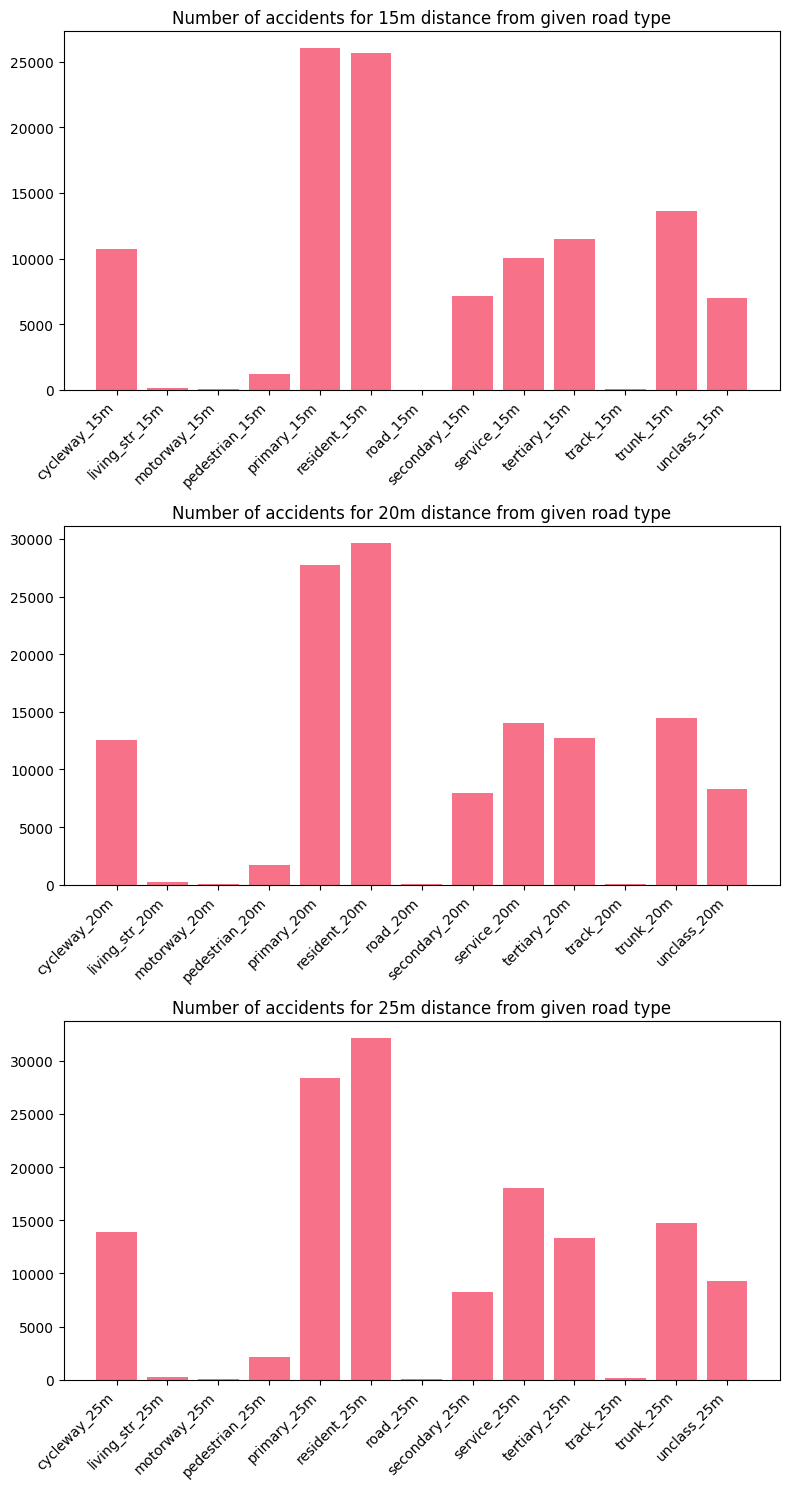

In [92]:
columns_15 = [col for col in df.columns if '15' in col]
columns_20 = [col for col in df.columns if '20' in col]
columns_25 = [col for col in df.columns if '25' in col]

fig, axs = plt.subplots(3, 1, figsize=(8, 15))

summed_values_15 = df[columns_15].sum()
axs[0].bar(summed_values_15.index, summed_values_15.values)
axs[0].set_title('Number of accidents for 15m distance from given road type')

summed_values_20 = df[columns_20].sum()
axs[1].bar(summed_values_20.index, summed_values_20.values)
axs[1].set_title('Number of accidents for 20m distance from given road type')

summed_values_25 = df[columns_25].sum()
axs[2].bar(summed_values_25.index, summed_values_25.values)
axs[2].set_title('Number of accidents for 25m distance from given road type')

for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

For each distance (15m, 20m, 25m), the plots are relatively similar (which is quite intuitive). The most accidents happened in presence of primary road or residential street. We can already assume that the presence of these types of roads could possibly be an important factor for cycle accidents.

### Summary of predictors related to accident description:

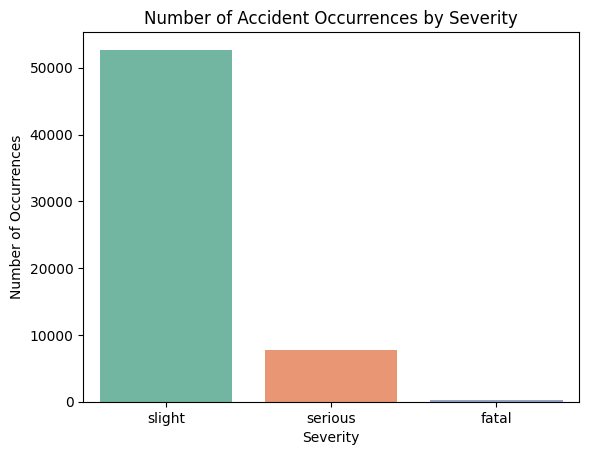

In [93]:
severity_counts = df['Severity'].value_counts()
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette="Set2")
plt.title('Number of Accident Occurrences by Severity')
plt.xlabel('Severity')
plt.ylabel('Number of Occurrences')

plt.show()

In [97]:
df['Casualties'] = df['Casualties'].apply(lambda x: str(x).split(','))
all_casualties = [casualty for sublist in df['Casualties'] for casualty in sublist]

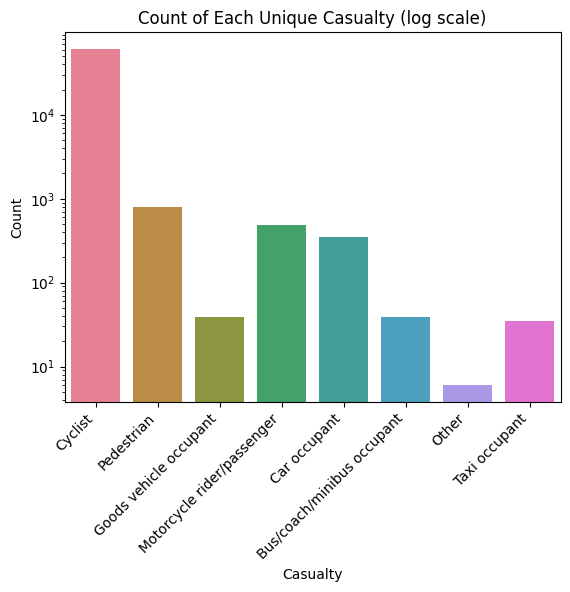

In [98]:
unique_casualties = list(set(all_casualties))

casualty_counts = Counter(all_casualties)
sns.barplot(x=list(casualty_counts.keys()), y=list(casualty_counts.values()), palette="husl")
plt.title('Count of Each Unique Casualty (log scale)')
plt.xlabel('Casualty')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.show()

The majority of accidents were slight accidents and the casualties (apart from cyclists) involved mostly pedestrians, motorcycle riders and car occupants.

In [35]:
df[['Number of Casualties', 'Number of Vehicles']].describe()

,Number of Casualties,Number of Vehicles
count,60647.000000,60647.000000
mean,1.035599,1.972843
std,0.195257,0.266780
min,1.000000,1.000000
25%,1.000000,2.000000
50%,1.000000,2.000000
75%,1.000000,2.000000
max,6.000000,6.000000


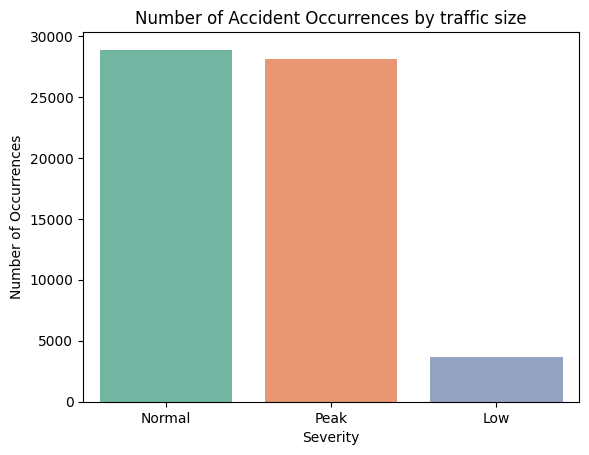

In [99]:
traffic_counts = df['Traffic'].value_counts()
sns.barplot(x=traffic_counts.index, y=traffic_counts.values, palette="Set2")
plt.title('Number of Accident Occurrences by traffic size')
plt.xlabel('Severity')
plt.ylabel('Number of Occurrences')

plt.show()

### Summary of columns related to weather conditions:

In [100]:
df[['cloud_cover', 'global_radiation', 'mean_temp', 'precipitation', 'pressure', 'sunshine']].describe()

,cloud_cover,global_radiation,mean_temp,precipitation,pressure,sunshine
count,60647.000000,60647.000000,60647.00000,60647.000000,60647.000000,60647.000000
mean,4.585932,131.746879,13.07823,1.557307,101568.493083,4.848570
std,2.363337,89.097727,5.53013,3.588567,977.241767,4.104324
min,0.000000,12.000000,-4.10000,0.000000,97310.000000,0.000000
25%,3.000000,50.000000,8.90000,0.000000,101010.000000,1.000000
50%,5.000000,116.000000,13.50000,0.000000,101640.000000,4.200000
75%,7.000000,203.000000,17.30000,1.400000,102215.000000,7.900000
max,9.000000,345.000000,28.80000,51.600000,104380.000000,15.300000


# Modelling

Some important notes:
1. We have variables related to `date` and `time` of the accident occurence. However, the accidents themselves should not be dependent on these factors anyway, but rather weather + road conditions. 
2. Therefore, the modelling of hazard rate does not seem to be appropriate in this particular task, as the time of event (in this case accident) does not seem to be relevant. As a result of the conclusions, usage of Cox regression model or other survival analysis tool does not seem to be appropriate in this case.

Considering those observations, the research and modelling I am going to conduct will be as follows:
1. Investigation and identification of main risk factors in distincion of normal and deadly accidents 
2. Stratification by Borough/Ward

# To be done on 08.04.2024 with 1 day delay:

## Normal vs deadly accidents

## Stratification by Borough/Ward